In [1]:
!pip install openpyxl


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, TensorDataset
# 指定文件路径
file_path = '附件一（训练集）.xlsx'

# 使用pandas的read_excel函数读取数据
df = pd.read_excel(file_path)

# 显示数据框架的前几行，以确保数据被正确读取
print(df.head())

   温度，oC  频率，Hz    磁芯损耗，w/m3 励磁波形  0（磁通密度B，T）         1         2         3  \
0     25  50030  1997.955250  正弦波    0.000213  0.000389  0.000566  0.000743   
1     25  50020  2427.749830  正弦波   -0.000551 -0.000358 -0.000165  0.000028   
2     25  50020  3332.725760  正弦波   -0.003780 -0.003564 -0.003349 -0.003134   
3     25  50020  4502.908007  正弦波   -0.000511 -0.000267 -0.000023  0.000222   
4     25  50030  6063.023248  正弦波    0.000458  0.000732  0.001007  0.001281   

          4         5  ...      1014      1015      1016      1017      1018  \
0  0.000919  0.001096  ... -0.001551 -0.001374 -0.001198 -0.001022 -0.000846   
1  0.000221  0.000413  ... -0.002476 -0.002284 -0.002091 -0.001899 -0.001707   
2 -0.002919 -0.002704  ... -0.005927 -0.005713 -0.005499 -0.005285 -0.005070   
3  0.000466  0.000711  ... -0.002950 -0.002707 -0.002463 -0.002220 -0.001976   
4  0.001555  0.001830  ... -0.002290 -0.002016 -0.001741 -0.001466 -0.001192   

       1019      1020      1021      1022   

In [2]:
# 读取特定的工作表，可以是工作表的名称或索引
df1 = pd.read_excel(file_path, sheet_name='材料1')
df1=df1[df['励磁波形']=='正弦波']
df1

,温度，oC,频率，Hz,磁芯损耗，w/m3,励磁波形,0（磁通密度B，T）,1,2,3,4,5,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,25,50030,1997.955250,正弦波,0.000213,0.000389,0.000566,0.000743,0.000919,0.001096,...,-0.001551,-0.001374,-0.001198,-0.001022,-0.000846,-0.000669,-0.000492,-0.000316,-0.000140,0.000036
1,25,50020,2427.749830,正弦波,-0.000551,-0.000358,-0.000165,0.000028,0.000221,0.000413,...,-0.002476,-0.002284,-0.002091,-0.001899,-0.001707,-0.001515,-0.001322,-0.001129,-0.000937,-0.000744
2,25,50020,3332.725760,正弦波,-0.003780,-0.003564,-0.003349,-0.003134,-0.002919,-0.002704,...,-0.005927,-0.005713,-0.005499,-0.005285,-0.005070,-0.004855,-0.004640,-0.004425,-0.004210,-0.003995
3,25,50020,4502.908007,正弦波,-0.000511,-0.000267,-0.000023,0.000222,0.000466,0.000711,...,-0.002950,-0.002707,-0.002463,-0.002220,-0.001976,-0.001732,-0.001488,-0.001244,-0.001000,-0.000756
4,25,50030,6063.023248,正弦波,0.000458,0.000732,0.001007,0.001281,0.001555,0.001830,...,-0.002290,-0.002016,-0.001741,-0.001466,-0.001192,-0.000917,-0.000642,-0.000367,-0.000092,0.000183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,90,316230,54682.608350,正弦波,-0.000427,-0.000156,0.000114,0.000384,0.000655,0.000925,...,-0.003127,-0.002857,-0.002587,-0.002317,-0.002047,-0.001777,-0.001507,-0.001238,-0.000967,-0.000697
1063,90,316230,71443.968180,正弦波,-0.001780,-0.001476,-0.001172,-0.000868,-0.000565,-0.000261,...,-0.004812,-0.004509,-0.004207,-0.003903,-0.003600,-0.003297,-0.002994,-0.002691,-0.002387,-0.002084
1064,90,316230,94691.425060,正弦波,-0.000111,0.000231,0.000572,0.000914,0.001255,0.001597,...,-0.003523,-0.003182,-0.002841,-0.002500,-0.002159,-0.001818,-0.001477,-0.001135,-0.000794,-0.000452
1065,90,316230,123821.811900,正弦波,0.002825,0.003208,0.003592,0.003976,0.004359,0.004741,...,-0.001011,-0.000628,-0.000244,0.000139,0.000523,0.000906,0.001290,0.001674,0.002057,0.002441


In [3]:
import numpy as np
last_1024_columns = df1.iloc[:, -1024:]
df1=df1.iloc[:, :-1025]
# 计算每一行的最大值
df1['B'] = last_1024_columns.max(axis=1)
new_column_names = {
    '温度，oC': 'T',
    '频率，Hz': 'F',
    '磁芯损耗，w/m3': 'P',
    'B': 'B'
}
df1 = df1.rename(columns=new_column_names)
df1[['T','F','P', 'B']] = np.log(df1[['T','F','P', 'B']])
df1

,T,F,P,B
0,3.218876,10.820378,7.599880,-3.545693
1,3.218876,10.820178,7.794720,-3.460337
2,3.218876,10.820178,8.111546,-3.337245
3,3.218876,10.820178,8.412479,-3.218490
4,3.218876,10.820378,8.709964,-3.100479
...,...,...,...,...
1062,4.499810,12.664225,10.909301,-3.132451
1063,4.499810,12.664225,11.176669,-3.015622
1064,4.499810,12.664225,11.458379,-2.893757
1065,4.499810,12.664225,11.726599,-2.779190


In [4]:
import numpy as np
from scipy.optimize import curve_fit

# 定义模型函数
def model_func(X, A, C, D):
    F,B=X
    return A * np.power(F, C) * np.power(B, D)

# 假设你有一些数据
F = np.array(df1['F'])  # 自变量F的值
B = np.array(df1['B'])  # 自变量B的值
P = np.array(df1['P'])  # 因变量P的值

# 将自变量组合成一个二维数组
X_data = np.vstack((F, B))

# 使用curve_fit进行拟合
params, covariance = curve_fit(model_func, X_data, P, p0=[1, 1, 1])

A, C, D = params
df1['ypred1']=A * F**C * B**D
mse1 = ((df1['P'] - df1['ypred1']) ** 2).mean()
mse1

C:\Users\74860\AppData\Local\Temp\ipykernel_6824\1040560344.py:7: RuntimeWarning: invalid value encountered in power
  return A * np.power(F, C) * np.power(B, D)
C:\Users\74860\AppData\Local\Temp\ipykernel_6824\1040560344.py:18: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(model_func, X_data, P, p0=[1, 1, 1])


nan

In [5]:
y=df1['P'].values
X=df1[['T','F','B']].values
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.00001, random_state=42)
if torch.cuda.is_available():
    train_dataset = TensorDataset(X_train.to('cuda:0'), y_train.to('cuda:0'))
    test_dataset = TensorDataset(X_test.to('cuda:0'), y_test.to('cuda:0'))

# 创建一个字典来存储数据集
dataset = {
    'train_input': train_dataset.tensors[0],
    'test_input': test_dataset.tensors[0],
    'train_label': train_dataset.tensors[1],
    'test_label':test_dataset.tensors[1]
}
dataset

{'train_input': tensor([[ 4.2485, 11.7429, -2.9003],
         [ 3.2189, 11.8584, -1.5268],
         [ 3.2189, 11.3973, -3.9276],
         ...,
         [ 3.2189, 11.5124, -1.5167],
         [ 4.4998, 12.5491, -3.5864],
         [ 4.4998, 11.2830, -2.4408]], device='cuda:0'),
 'test_input': tensor([[ 4.2485, 12.2036, -2.0927]], device='cuda:0'),
 'train_label': tensor([[ 9.5117],
         [13.8412],
         [ 7.3349],
         ...,
         [13.3727],
         [ 9.6158],
         [ 9.7533]], device='cuda:0'),
 'test_label': tensor([[12.5743]], device='cuda:0')}

In [6]:
import torch
torch.set_default_dtype(torch.float64) # 设置默认张量数据类型为双精度浮点数
torch.manual_seed(33) # 设置随机数种子为33
from kan import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# 创建一个KAN模型：
# 输入维度为2，输出维度为1，隐藏层有5个神经元
# 使用三次样条（k=3），将输入空间划分为5个网格间隔（grid=5）
# 设置随机数种子为0
model = KAN(width=[3,1], grid=5, k=3, seed=0,device=device)

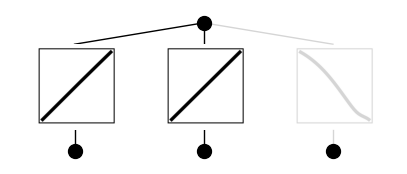

In [7]:
# 绘制初始化时的KAN模型图形
model(dataset['train_input']);
# 使用 plot 方法绘制模型的输出结果
# 设置 beta 参数为 100，用于控制平滑度
model.plot(beta=50)

In [8]:
# 对模型进行训练
# 使用 LBFGS 优化器
# 进行 20 步训练
# 设置正则化参数为 0.01
# 设置信息熵正则化参数为 10.0
# 在给定的设备上进行训练
model.train(dataset, opt="LBFGS", steps=10, lamb=0.01, lamb_entropy=10.,device=device);

description:   0%|                                                           | 0/10 [00:00<?, ?it/s]c:\Users\74860\Desktop\deep learning\kanmodel\kan\KAN.py:327: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.acts_scale_std.append(torch.std(postacts, dim=0))
train loss: 1.72e-01 | test loss: 1.42e-01 | reg: 1.24e+01 : 100%|██| 10/10 [00:01<00:00,  5.27it/s]


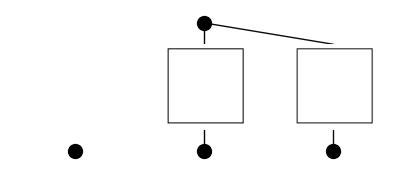

In [9]:
model.plot() # 使用 plot 方法绘制训练后的KAN模型

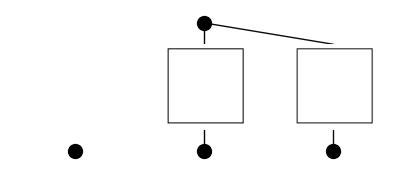

In [10]:
# 对KAN模型进行修剪
model.prune()
# 使用 plot 方法绘制修剪后的KAN模型
# 设置 mask=True 以保持原始形状
model.plot(mask=True)

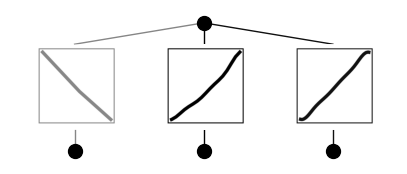

In [11]:
model = model.prune()
# 使用修剪后的模型对训练输入数据进行预测
model(dataset['train_input'])
# 使用 plot 方法绘制修剪后的KAN模型的输出结果
model.plot()

train loss: 1.70e-01 | test loss: 1.27e-01 | reg: 1.24e+01 : 100%|████| 5/5 [00:00<00:00,  5.26it/s]


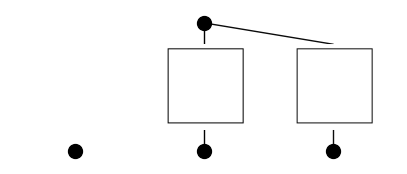

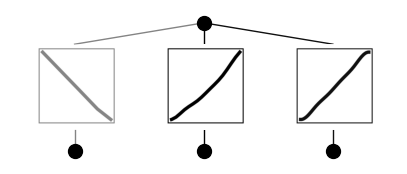

In [12]:
model.train(dataset, opt="LBFGS", steps=5, lamb=0.01, lamb_entropy=10.,device=device);
# 对KAN模型进行修剪
model.prune()
# 使用 plot 方法绘制修剪后的KAN模型
# 设置 mask=True 以保持原始形状
model.plot(mask=True)
model = model.prune()
# 使用修剪后的模型对训练输入数据进行预测
model(dataset['train_input'])
# 使用 plot 方法绘制修剪后的KAN模型的输出结果
model.plot()

train loss: 1.68e-01 | test loss: 1.24e-01 | reg: 1.24e+01 : 100%|████| 5/5 [00:00<00:00,  5.59it/s]


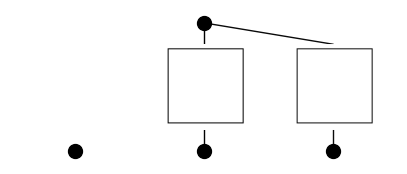

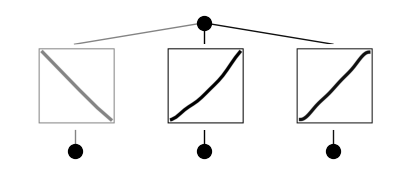

In [13]:
model.train(dataset, opt="LBFGS", steps=5, lamb=0.01, lamb_entropy=10.,device=device);
# 对KAN模型进行修剪
model.prune()
# 使用 plot 方法绘制修剪后的KAN模型
# 设置 mask=True 以保持原始形状
model.plot(mask=True)
model = model.prune()
# 使用修剪后的模型对训练输入数据进行预测
model(dataset['train_input'])
# 使用 plot 方法绘制修剪后的KAN模型的输出结果
model.plot()

train loss: 1.68e-01 | test loss: 1.18e-01 | reg: 1.24e+01 : 100%|████| 5/5 [00:00<00:00, 10.14it/s]


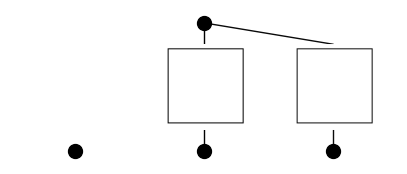

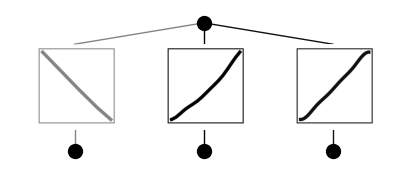

In [14]:
model.train(dataset, opt="LBFGS", steps=5, lamb=0.01, lamb_entropy=10.,device=device);
# 对KAN模型进行修剪
model.prune()
# 使用 plot 方法绘制修剪后的KAN模型
# 设置 mask=True 以保持原始形状
model.plot(mask=True)
model = model.prune()
# 使用修剪后的模型对训练输入数据进行预测
model(dataset['train_input'])
# 使用 plot 方法绘制修剪后的KAN模型的输出结果
model.plot()

In [15]:
X_train

tensor([[ 4.2485, 11.7429, -2.9003],
        [ 3.2189, 11.8584, -1.5268],
        [ 3.2189, 11.3973, -3.9276],
        ...,
        [ 3.2189, 11.5124, -1.5167],
        [ 4.4998, 12.5491, -3.5864],
        [ 4.4998, 11.2830, -2.4408]], dtype=torch.float32)

In [16]:
# import shap
# explainer = shap.Explainer(model.model_predict,dataset['train_input'].cpu().numpy())  # 使用预测函数
# shap_values = explainer(dataset['train_input'].cpu().numpy())


In [17]:
# 设置 mode 变量为 "auto" 或 "manual"，以确定激活函数的设置方式
mode = "manual"  # 或者 mode = "manual"
# 如果 mode 是 "manual"，则手动设置激活函数为符号函数
if mode == "manual":
    # 手动模式下，逐个指定隐藏层和输入层的激活函数
    # 第一个参数表示层的索引，第二个和第三个参数表示神经元的索引
    # 第四个参数为要设置的激活函数，例如 'sin', 'x^2', 'exp' 等
    model.fix_symbolic(0,0,0,'x'); # 设置第一个隐藏层的第一个神经元的激活函数为正弦函数
    model.fix_symbolic(0,1,0,'x'); # 设置第一个隐藏层的第二个神经元的激活函数为平方函数
    model.fix_symbolic(0,2,0,'x'); # 设置第一个隐藏层的第二个神经元的激活函数为平方函数
    # model.fix_symbolic(1,0,0,'x'); # 设置输出层的第一个神经元的激活函数为指数函数
# 如果 mode 是 "auto"，则自动设置激活函数为符号函数
elif mode == "auto":
    # 自动模式下，根据提供的激活函数库自动选择合适的符号函数作为激活函数
    lib = ['x','sin']
    model.auto_symbolic(lib=lib)

Best value at boundary.
r2 is 0.9991339937025693
Best value at boundary.
r2 is 0.9830527336175551
Best value at boundary.
r2 is 0.9985380982648674


In [19]:
model.symbolic_formula()[0][0] # 获取模型的符号化公式
df1['ypred']=-0.56*df1['T']+1.63*df1['F']+2.52*df1['B']+0.27
# df1

In [20]:
!pip install statsmodels


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
X = df1[['F', 'B']]
y=df1['P']
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 1.570e+04
Date:                Tue, 24 Sep 2024   Prob (F-statistic):               0.00
Time:                        00:29:36   Log-Likelihood:                -409.66
No. Observations:                1067   AIC:                             825.3
Df Residuals:                    1064   BIC:                             840.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6508      0.248     -6.666      0.0

In [22]:
df1['ypred1']=-1.6508+ 1.6059*df1['F']+2.5066*df1['B']
df1

,T,F,P,B,ypred1,ypred
0,3.218876,10.820378,7.599880,-3.545693,6.838011,7.169500
1,3.218876,10.820178,7.794720,-3.460337,7.051644,7.384271
2,3.218876,10.820178,8.111546,-3.337245,7.360186,7.694463
3,3.218876,10.820178,8.412479,-3.218490,7.657856,7.993724
4,3.218876,10.820378,8.709964,-3.100479,7.953985,8.291439
...,...,...,...,...,...,...
1062,4.499810,12.664225,10.909301,-3.132451,10.834878,10.499018
1063,4.499810,12.664225,11.176669,-3.015622,11.127721,10.793426
1064,4.499810,12.664225,11.458379,-2.893757,11.433188,11.100526
1065,4.499810,12.664225,11.726599,-2.779190,11.720361,11.389234


In [23]:
mse = ((np.exp(df1['P']) - np.exp(df1['ypred'])) ** 2).mean()
mse1 = ((np.exp(df1['P']) - np.exp(df1['ypred1'])) ** 2).mean()
print(mse,mse1)

520384573.8409654 1847531808.1340034
